<a href="https://colab.research.google.com/github/ijustride/Study/blob/master/bolts_nuts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import the necessary modules
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle


from PIL import Image

# Define a function to load images from a folder and return a numpy array
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            # Resize the image to a fixed size (e.g. 64x64 pixels)
            img = img.resize((64, 64))
            # Convert the image to grayscale
            img = img.convert("L")
            # Flatten the image to a 1D array
            img = np.array(img).flatten()
            # Normalize the pixel values to [0, 1] range
            img = img / 255.0
        # Append the image to the list
        images.append(img)
    return np.array(images)


# Load the images of bolts and nuts
X_bolts = load_images("bolts")
X_nuts = load_images("nuts")

# Create the labels for the images
# We use 0 for bolts and 1 for nuts
y_bolts = np.zeros(52)
y_nuts = np.ones(27)

# Concatenate the images and labels
X = np.concatenate((X_bolts, X_nuts))
y = np.concatenate((y_bolts, y_nuts))

# Split the data into train and test sets
# We use 80% for train and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)
filename="bolts_nuts_model.pkl"
pickle.dump(model,open(filename,"wb"))



Accuracy: 0.9375


In [ ]:
!unzip datatest.zip

Archive:  datatest.zip
   creating: datatest/
  inflating: datatest/5X-ORADEjrw.jpg  
  inflating: datatest/AMsogmU4nko.jpg  
  inflating: datatest/cqj1Z0qV-rw.jpg  
  inflating: datatest/DmPfIx0adn4.jpg  
  inflating: datatest/nTJbVVeoq9o.jpg  


Datatest predictions: [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]


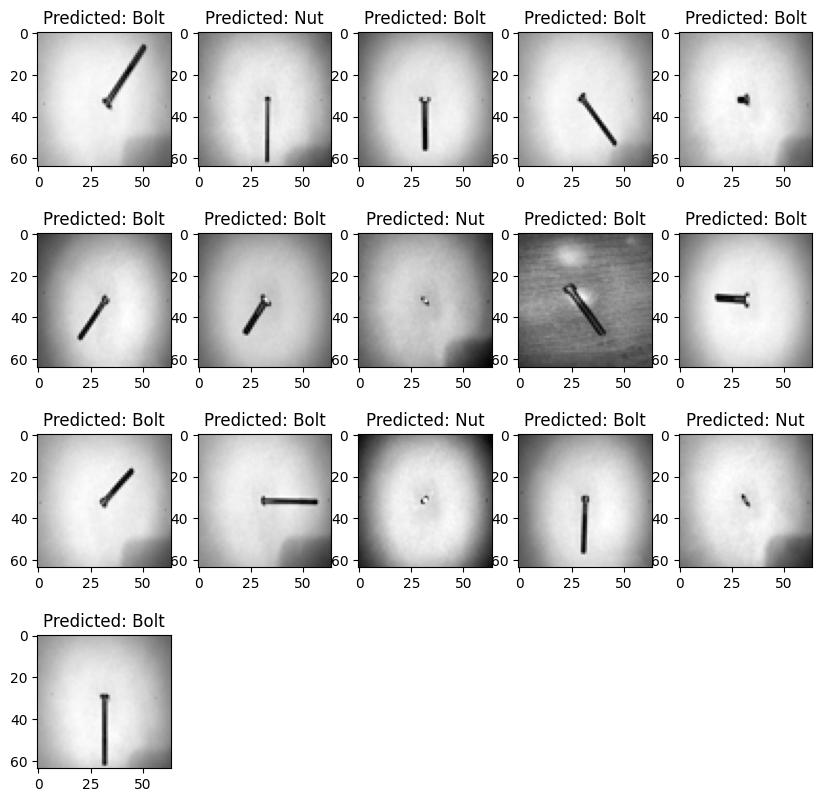

In [ ]:
# Evaluate the model on the datatest set
#X_datatest = load_images("datatest")

#y_datatest = model.predict(X_datatest)
y_datatest = model.predict(X_test)
print("Datatest predictions:", y_datatest)

# Plot some examples of the datatest set and their predictions
plt.figure(figsize=(10, 10))
for i in range(len(y_datatest)):
    plt.subplot(4, 5, i + 1)
    #plt.imshow(X_datatest[i].reshape(64, 64), cmap="gray")
    plt.imshow(X_test[i].reshape(64, 64), cmap="gray")
    plt.title("Predicted: {}".format("Nut" if y_datatest[i] == 1 else "Bolt"))
plt.show()